# <font color='blue'>Data Science Academy</font>
# <font color='blue'>Matemática Para Machine Learning</font>

## Lista de Exercícios  - Capítulo 11

O objetivo desta lista de exercícios é você praticar os principais conceitos estudados neste capítulo, ao mesmo tempo que desenvolve suas habilidades em lógica de programação com a linguagem Python. 

Caso tenha dúvidas, isso é absolutamente normal e faça um trabalho de pesquisa a fim de relembrar o formato das operações matemáticas.

Quando encontrar o formato de uma operação que resolva o exercício proposto, use a linguagem Python para representar esta operação. Em essência, é assim que aplicamos Matemática Para Machine Learning, construindo algoritmos e representando esses algoritmos em linguagem de programação.

Divirta-se!!

## Cálculo

O Cálculo, mais apropriadamente chamado de análise, é o ramo da Matemática que estuda a taxa de variação de quantidades (que pode ser interpretada como declives de curvas) além do comprimento, a área e o volume dos objetos. 

A palavra Cálculo vem do latim que significa "pequena pedra" (small stone), porque é como entender algo olhando pequenos pedaços.

Cálculo é um campo intrínseco de Matemática e a essência em muitos algoritmos de aprendizado de máquina. Sua compreensão é fundamental para quem pretende trabalhar com Data Science.

O Cálculo é dividido em Cálculo Diferencial e Integral.

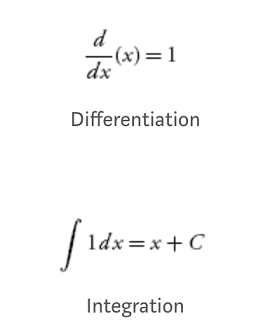

In [1]:
from IPython.display import Image
Image("images/image01.png")

De forma bem simples:

* Cálculo Diferencial - corta "algo" em pequenos pedaços para descobrir como "algo" muda.

* Cálculo Integral - junta (integra) os pequenos pedaços para descobrir o quanto existe como um todo.

Recomendamos que você assista aos vídeos sobre Cálculo do canal 3blue1brown, que ensina alguns pilares importantes do Cálculo de forma bem visual:

https://www.3blue1brown.com/

Há ainda um ótimo material com todas as fórmulas e exemplos sobre Limites, Diferencial e Integral:

https://www.mathsisfun.com/calculus/


## Calculando Derivada e Integral com SymPy

https://peerj.com/articles/cs-103.pdf

## Derivada

### Exercício 1 - Calcule a derivada de "x elevado ao quadrado".

Dica: Para obter derivadas, use a função diff com SymPy.

In [5]:
# Solução
from sympy import *
x, y, z = symbols('x y z')
init_printing(use_unicode=True)

diff(x**2, x)

### Exercício 2 - Calcule a terceira derivada de "x elevado a quarta potência".

Dica: A função diff pode calcular várias derivadas de uma só vez. Para obter várias derivadas, passe a variável quantas vezes quiser diferenciar ou passe um número após a variável.

In [3]:
# Solução
from sympy import *
x, y, z = symbols('x y z')
init_printing(use_unicode=True)

diff(x**4, x, 3)

Para criar uma derivada não avaliada (ou seja, apenas sua representação em fórmula), use a classe Derivative(). Tem a mesma sintaxe do diff. Para isso, considere a expressão: (expr, x, y, y, z, 4).

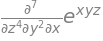

In [4]:
from sympy import *
x, y, z = symbols('x y z')
init_printing(use_unicode=True)

expr = exp(x*y*z)
deriv = Derivative(expr, x, y, y, z, 4)
deriv

### Exercício 3 - Execute a derivada não avaliada que você definiu no item anterior.

In [6]:
# Solução
from sympy import *
x, y, z = symbols('x y z')
init_printing(use_unicode=True)

expr = exp(x*y*z)
diff(expr, x, y, y, z, 4)

## Integral

### Exercício 4 - Calcule a integral do coseno de uma variável x.

Para calcular uma integral, use a função integrate(). Existem dois tipos de integrais, definidos e indefinidos. Para calcular uma integral indefinida, isto é, uma antiderivada, ou primitiva, basta passar a variável após a expressão.

In [7]:
# Solução
from sympy import *
x, y, z = symbols('x y z')
init_printing(use_unicode=True)

integrate(cos(x), x)

Para representar a fórmula da Interal, usamos:

Integral(log(x)**2, x)


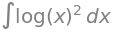

In [8]:
expr = Integral(log(x)**2, x)
print(expr)
expr

## Resolvendo Equações Diferenciais com SymPy

### Exercício 5 - Para resolver equações diferenciais com SymPy, use a função dsolve(). Primeiro, crie uma função indefinida passando cls = Function para a função de símbolos.

Esses objetos não avaliados são úteis para atrasar a avaliação da derivada ou para fins de impressão. Eles também são usados quando o SymPy não sabe como calcular a derivada de uma expressão (por exemplo, se ela contém uma função indefinida

In [9]:
# Solução

# f e g são funções indefinidas. Podemos chamar f(x) e isso representará uma função desconhecida.
f, g = symbols('f g', cls=Function)
f(x)

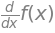

In [10]:
# Derivadas de f(x) não são avaliadas.
f(x).diff(x)

Para representar a equação diferencial f″(x) − 2f′(x) + f(x) = sin(x), usaríamos:

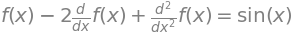

In [11]:
diffeq = Eq(f(x).diff(x, x) - 2*f(x).diff(x) + f(x), sin(x))
diffeq

Para resolver a equação, usamos dsolve.

In [12]:
dsolve(diffeq, f(x))

dsolve retorna uma instância da Eq. Isso ocorre porque, em geral, soluções para equações diferenciais não podem ser resolvidas explicitamente para a função. As constantes arbitrárias nas soluções de dsolve são símbolos da forma C1, C2, C3 e assim por diante.

In [13]:
dsolve(f(x).diff(x)*(1 - sin(f(x))), f(x))

### Gradiente Descendente

http://deeplearningbook.com.br/aprendizado-com-a-descida-do-gradiente/

Um gradiente mede o quanto a saída de uma função muda se você alterar um pouco as entradas. 

A maioria das tarefas em Machine Learning são na verdade problemas de otimização e um dos algoritmos mais usados para isso é o Algoritmo de Descida do Gradiente. Para um iniciante, o nome Algoritmo de Descida do Gradiente pode parecer intimidante, mas espero que depois de ler o que está logo abaixo, isso deixe de ser um mistério para você.

A Descida do Gradiente é uma ferramenta padrão para otimizar funções complexas iterativamente dentro de um programa de computador. Seu objetivo é: dada alguma função arbitrária, encontrar um mínimo. Para alguns pequenos subconjuntos de funções – aqueles que são convexos – há apenas um único mínimo que também acontece de ser global. Para as funções mais realistas, pode haver muitos mínimos, então a maioria dos mínimos são locais. Certifique-se de que a otimização encontre o “melhor” mínimo e não fique preso em mínimos sub-otimistas (um problema comum durante o treinamento do algoritmo).

Ou seja, a Descida do Gradiente é um algoritmo de otimização usado para encontrar os valores de parâmetros (coeficientes ou se preferir w e b – weight e bias) de uma função que minimizam uma função de custo. A Descida do Gradiente é melhor usada quando os parâmetros não podem ser calculados analiticamente (por exemplo, usando álgebra linear) e devem ser pesquisados por um algoritmo de otimização.

Suponha que você tenha uma bola e uma tigela. Não importa onde você deslize a bola na tigela, ela acabará caindo no fundo da tigela.

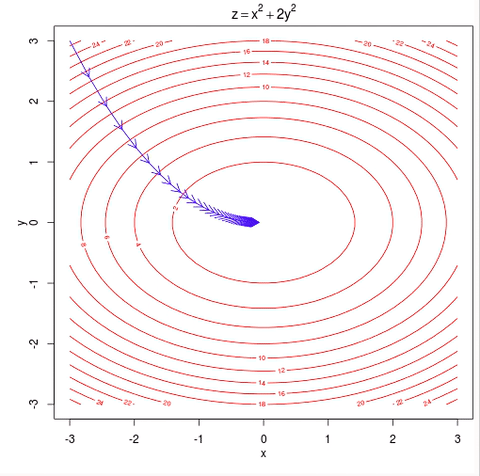

In [1]:
from IPython.display import Image
Image("images/image02.gif")

Como você pode ver, esta bola segue um caminho que termina no fundo da tigela. As linhas vermelhas são o gradiente da tigela e a linha azul é o caminho da bola, e como o caminho da inclinação da bola está diminuindo, ela é chamada de gradiente de descida (gradiente descendente).

Em nosso modelo de aprendizado de máquina, nosso objetivo é reduzir o custo. A função custo é usada para monitorar o erro nas previsões de um modelo de Machine Learning. Portanto, minimizar isso significa basicamente obter o menor valor de erro possível ou aumentar a precisão do modelo. Em suma, aumentamos a precisão iterando sobre um conjunto de dados de treinamento ao ajustar os parâmetros (os pesos e vieses) do nosso modelo.

Vamos considerar o seguinte exemplo. Imagine que uma universidade queira prever a profissão dos alunos com base em suas notas em uma série de disciplinas. Coletamos então dados passados de notas e as profissões dos alunos. Nosso objetivo é prever a profissão dos alunos considerando as notas em algumas disciplinas. Observe a tabela abaixo:

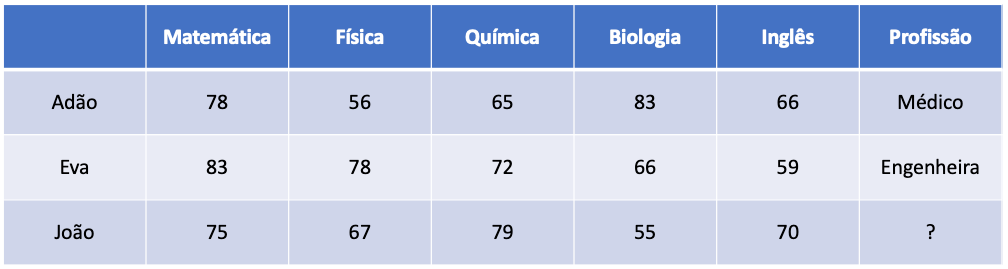

In [2]:
from IPython.display import Image
Image("images/image03.png")

Neste conjunto de dados, temos dados de Adão e Eva. Usando como referência os dados de Adão e Eva, temos que prever a profissão de João.

Agora pense nas notas como um gradiente e profissão como o alvo inferior na "tigela". Você precisa otimizar seu modelo para que o resultado previsto na parte inferior seja preciso. Usando os dados de Adão e Eva, usaremos gradiente descendente e ajustaremos nosso modelo de tal forma que, se inserirmos as notas de Adão, ele deverá prever o resultado de Médico na parte inferior do gradiente e o mesmo para Eva que é Engenheira. Este é o nosso modelo treinado. Agora, se dermos novas notas ao nosso modelo (as notas do João), podemos facilmente prever sua profissão.

Em teoria, isso é gradiente descendente, mas para calcular e modelar o gradiente descendente usamos as ferramentas oferecidas pelo Cálculo e agora podemos ver a importância do Cálculo na aprendizagem de máquina.

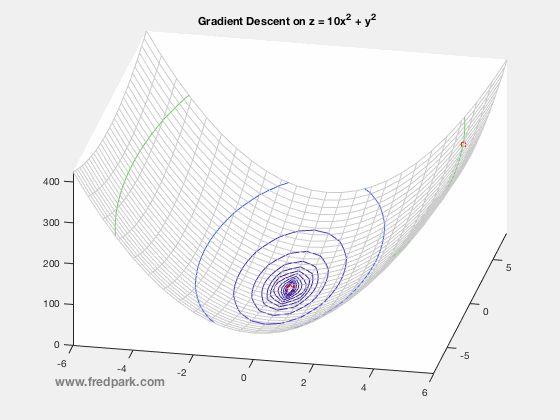

In [3]:
from IPython.display import Image
Image("images/image04.gif")

Primeiro vamos começar pelo tópico com o qual você já deve estar bem familiarizado: Álgebra Linear. Vamos usar a Álgebra Linear e sua fórmula para o nosso modelo.

A fórmula básica que podemos usar neste modelo é:

y = m * x + b

Onde,

* y = valor a ser previsto 
* m = declive da reta
* x = dado de entrada (variável preditora)
* b = intercepção no eixo y

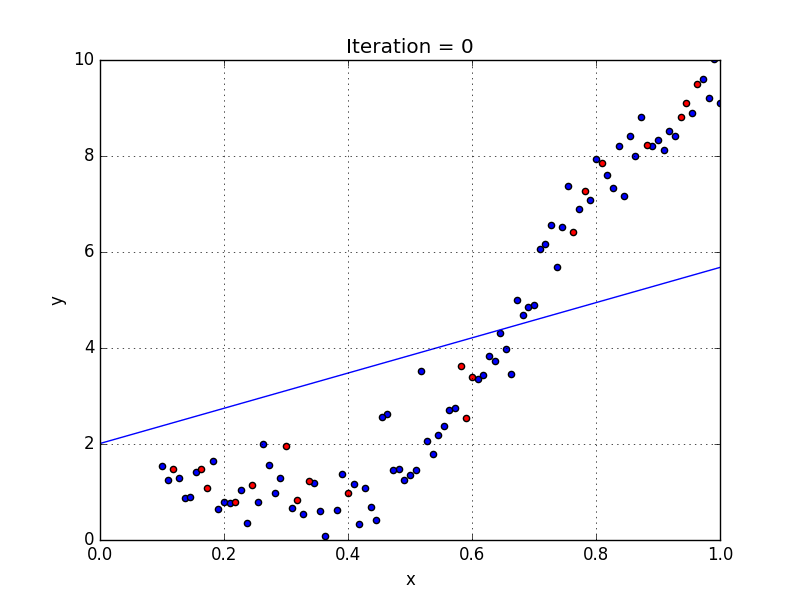

In [4]:
from IPython.display import Image
Image("images/image05.gif")

Uma abordagem padrão para resolver esse tipo de problema é definir uma função de erro (também chamada de função de custo) que mede o quão “boa” é uma determinada linha. Esta função terá um par (m, b) e retornará um valor de erro baseado em quão bem a linha se ajusta aos nossos dados. Para calcular esse erro para uma determinada linha, iteramos por cada ponto (x, y) em nosso conjunto de dados e somamos as distâncias quadradas entre o valor y de cada ponto e o valor y da linha candidata (calculado em mx + b). É convencional elevar ao quadrado essa distância para garantir que ela seja positiva e tornar nossa função de erro diferenciável (Método dos Mínimos Quadrados).

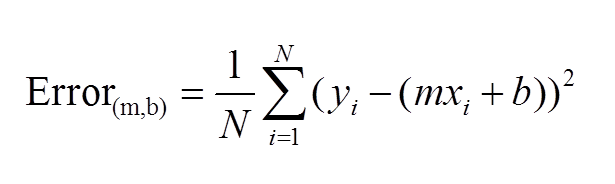

In [5]:
from IPython.display import Image
Image("images/image06.png")

Linhas que se ajustam melhor aos nossos dados (onde melhor é definido pela nossa função de erro) resultarão em valores de erro menores. Se minimizarmos essa função, obteremos a melhor linha para nossos dados. Como nossa função de erro consiste em dois parâmetros (m e b), podemos visualizá-lo como uma superfície bidimensional. Isto é o que parece para o nosso conjunto de dados:

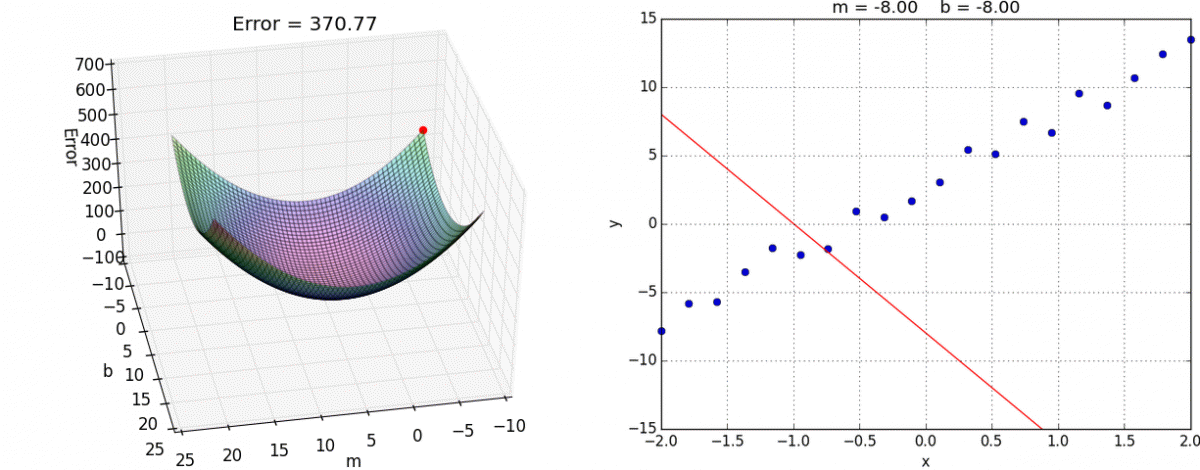

In [6]:
from IPython.display import Image
Image("images/image07.gif")

Cada ponto neste espaço bidimensional (gráfico da esquerda) representa uma linha. A altura da função em cada ponto é o valor de erro dessa linha. Você pode ver que algumas linhas geram valores de erro menores do que outras (isto é, ajustam melhor nossos dados). Quando executamos a busca por gradiente descendente, começaremos de algum local nessa superfície e desceremos para encontrar a linha com o menor erro.

Pelo que viu nas aulas de Cálculo até aqui, você sabe que para calcular a inclinação, usamos a Cálculo Diferencial e calculamos a derivada.

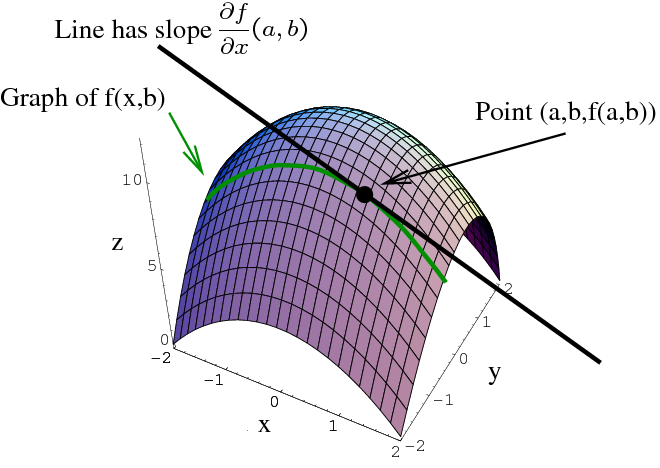

In [7]:
from IPython.display import Image
Image("images/image08.png")

Para executar o gradiente descendente nesta função de erro, primeiro precisamos calcular seu gradiente. O gradiente agirá como uma bússola e sempre nos apontará para baixo. Para calculá-lo, precisaremos diferenciar nossa função de erro. Como nossa função é definida por dois parâmetros (m e b), precisaremos calcular uma derivada parcial para cada um, da seguinte forma:

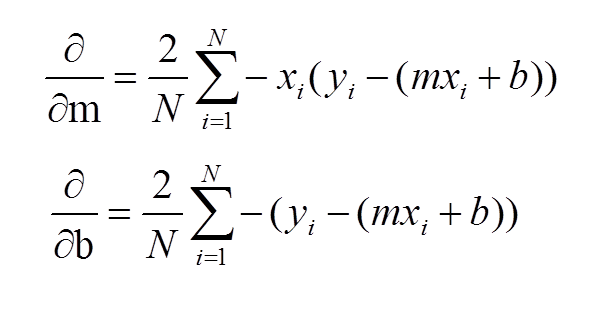

In [8]:
from IPython.display import Image
Image("images/image09.png")

Agora temos todas as ferramentas necessárias para executar a descida do gradiente. Podemos inicializar nossa busca para iniciar em qualquer par de valores m e b (ou seja, qualquer linha) e deixar que o algoritmo de descida do gradiente desacelere em nossa função de erro em direção à melhor linha. Cada iteração atualizará m e b para uma linha que produz um erro ligeiramente menor que a iteração anterior. A direção a ser movida para cada iteração é calculada usando as duas derivadas parciais de cima.

A variável Taxa de Aprendizado (Learning Rate) controla o tamanho de um passo que fazemos durante cada iteração. Se dermos um passo muito grande, podemos ultrapassar o mínimo. No entanto, se tomarmos pequenos passos, serão necessárias muitas iterações para chegar ao mínimo e consequentemente mais tempo de treinamento do modelo.

É isso! É assim que treinamos um algoritmo de Machine Learning com base na descida do gradiente (diversos algoritmos usam esta técnica).

Mais alguns conceitos importantes:

Convexidade - Em nosso problema de regressão linear, havia apenas um mínimo. Nossa superfície de erro era convexa. Independentemente de onde começamos, chegaríamos ao mínimo absoluto. Mas em geral, isso não é o caso. É possível ter um problema com os mínimos locais em que uma pesquisa de gradiente pode ficar presa. Há várias abordagens para atenuar isso (por exemplo, pesquisa de gradiente estocástico).

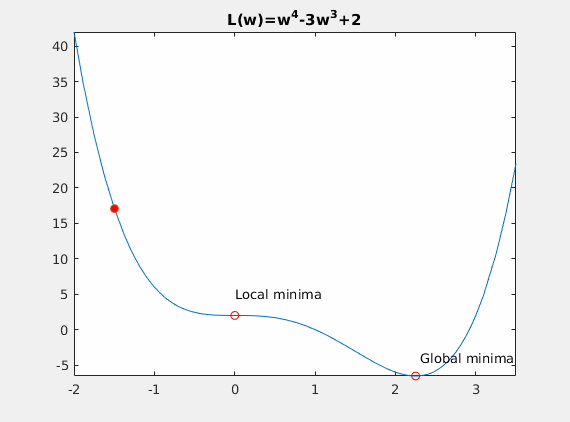

In [9]:
from IPython.display import Image
Image("images/image10.gif")

Convergência - Não falamos sobre como determinar quando a pesquisa encontra uma solução. Isso geralmente é feito procurando pequenas alterações iteração a iteração (por exemplo, onde o gradiente é próximo de zero).

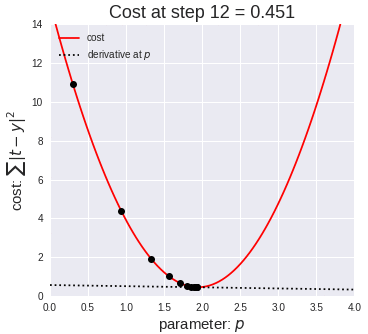

In [10]:
from IPython.display import Image
Image("images/image11.gif")

## Como Calcular as Derivadas Parciais

Como tomamos as derivadas de uma função como a seguinte?

$$f(x,y) = x^2 + y^2$$

Podemos tomar uma derivada das mudanças na função em relação a x ou y. Chamamos essas derivadas com relação a uma variável de derivada parcial. Vamos tentar isso tomando a derivada de $f(x, y)$ em relação a *** x ***. Escrevemos essa derivada parcial da seguinte maneira.

$$\frac{\partial f(x,y)}{\partial x} = \frac{\partial (x^2 + y^2)}{\partial x}$$

Assim como derivadas comuns nos dão uma maneira de calcular a taxa de mudança de uma função, derivadas parciais nos dão uma maneira de calcular a taxa de mudança de uma função de muitas variáveis em relação a uma dessas variáveis.

Como $f(x, y)$ é a soma de várias funções mais simples, precisamos tomar a derivada parcial de cada uma delas e somar o resultado. As duas primeiras partes são fáceis.

$$\frac{\partial x^2}{\partial x} = 2x$$

Observe que estamos seguindo as regras usuais de diferenciação para qualquer função de *** x *** aqui.

Agora precisamos pegar a derivada parcial da última parte de $f(x, y)$, que não depende de *** x ***. Nestes termos, obtemos o seguinte.

$$\frac{\partial y^2}{\partial x} = 0$$

Agora podemos adicionar as partes para obter a derivada parcial completa de $f(x, y)$.

$$\frac{\partial f(x,y)}{\partial x} = 2x + 0 = 2x$$

Nós também podemos pegar a derivada parcial de $f(x, y)$ em relação a *** y ***. O processo prossegue da seguinte maneira.

$$\frac{\partial f(x,y)}{\partial y} = 0 + 2y = 2y$$

## Computando Um Gradiente

Você pode perguntar qual é o ponto de calcular derivadas parciais? Sim, eles são um ótimo truque de Matemática, mas para que servem? Acontece que derivadas parciais são importantes se você quiser encontrar o análogo da inclinação para superfícies multidimensionais. Nós chamamos essa quantidade de ** gradiente **.

Lembre-se de que você pode encontrar o mínimo e o máximo de curvas usando derivadas. Da mesma forma, você pode encontrar o mínimo e o máximo de superfícies seguindo o gradiente e encontrando os pontos onde o gradiente é zero em todas as direções.

Você já examinou as derivadas parciais da função, $f(x,y) = x^2 + y^2$. Estas derivadas parciais são:

$$\frac{\partial f(x,y)}{\partial x} = 2x \\
\frac{\partial f(x,y)}{\partial y} = 2y$$

Neste caso, o gradiente é um vetor bidimensional da mudança da função na direção $x$ e a mudança na função na direção $y$. Este vetor pode ser escrito da seguinte forma:

$$grad(f(x,y)) =  \vec{g(x,y)} = \begin{bmatrix}\frac{\partial f(x,y)}{\partial x} \\ \frac{\partial f(x,y)}{\partial y} \end{bmatrix} = \begin{bmatrix}2x \\ 2y \end{bmatrix} $$

## Plotando o Gradiente

Um plot irá ajudá-lo a sentir o significado do gradiente. O código abaixo representa o gradiente da função $f(x,y) = x^2 + y^2$ junto com contornos do valor da função. Execute este código e examine o plot.

### Exercício 6 - Analise cuidadosamente o código abaixo e complete o código onde você encontrar a palavra "TODO". 

5
5
5
5
5
5
5
5
5
5
5
4
4
4
4
4
4
4
4
4
4
4
3
3
3
3
3
3
3
3
3
3
3
2
2
2
2
2
2
2
2
2
2
2
1
1
1
1
1
1
1
1
1
1
1
0
0
0
0
0
0
0
0
0
0
0
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-2
-2
-2
-2
-2
-2
-2
-2
-2
-2
-2
-3
-3
-3
-3
-3
-3
-3
-3
-3
-3
-3
-4
-4
-4
-4
-4
-4
-4
-4
-4
-4
-4
-5
-5
-5
-5
-5
-5
-5
-5
-5
-5
-5


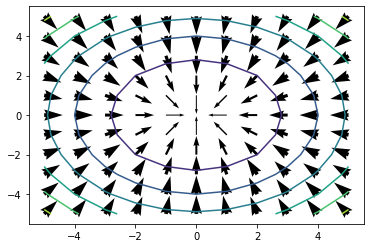

In [13]:
# Imports
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import math

# Cria uma grade uniforme
el = np.arange(-5,6)
nx, ny = np.meshgrid(el, el, sparse=False, indexing='ij')

# Define as listas
x_coord = []
y_coord = []
z = []

# Flatten da grade para 1-d e calcular o valor da função z
for i in range(11):  
    for j in range(11):
        print(nx)
        x_coord.append(float(-nx[i,j]))
        y_coord.append(float(-ny[i,j]))       
        z.append(nx[i,j]**2 + ny[i,j]**2)

# Realizar aritmética vetorial para obter os gradientes de x e y      
x_grad = [-2 * x for x in x_coord]
y_grad = [-2 * y for y in y_coord] 

# Plot das setas usando largura para gradiente
plt.xlim(-5.5,5.5)
plt.ylim(-5.5,5.5)

for x, y, xg, yg in zip(list(x_coord), list(y_coord), list(x_grad), list(y_grad)):
    if x != 0.0 or y != 0.0: 
        
        # Evite a divisão por zero ao dimensionar a seta
        l = math.sqrt(xg**2 + yg**2)/2.0
        plt.quiver(x, y, xg, yg, width = l, units = 'dots')

# Plot dos contornos da superfície da função
z = np.array(z).reshape(11,11)    
plt.contour(el, el, z)    

Observe as seguintes propriedades deste gráfico.

- As setas no ponto de plotagem na direção do gradiente.
- A largura das setas é proporcional ao valor do gradiente. A largura das setas e o gradiente ** diminui à medida que a função se aproxima do mínimo **. Se este for o caso em todos os lugares, você pode dizer que uma função é ** convexa **. É sempre muito mais fácil encontrar o mínimo de funções convexas.
- A direção ** do gradiente é sempre perpendicular aos contornos **. Esta é uma propriedade importante das funções multivariadas.

## Usando o gradiente

Então, para que tudo isso? Digamos que você queira encontrar o mínimo da função $f(x,y) = x^2 + y^2$. É fácil ver que o mínimo dessa função é de $x = 0$ e $y = 0$. Mas, e se você não conhecesse essa solução? Então você poderia fazer o seguinte:

1. Tome algum palpite inicial.
2. Calcule o gradiente.
3. Dê um pequeno passo na direção do gradiente.
4. Determine se o gradiente está próximo de zero. Em caso afirmativo, pare, pois o gradiente será zero no mínimo.
5. Repita as etapas 2, 3 e 4.

O algoritmo descrito acima é chamado de ** Algoritmo Gradiente Descendente **. É a base de muitos algoritmos de minimização do mundo real.

Dica: Para exercícios interativos em Cálculo, acesse: https://brilliant.org/calculus/

## Fim